In [2]:
from zipfile import ZipFile

dog_cats = "F:/Python/jupyter_projects/IzyCode_Intern_Projects/Image_Classification/dogs-vs-cats.zip"

# opening the zip file in read me mode
with ZipFile(dog_cats, 'r') as zip :
  print("Extracting the files...")
  zip.extractall()
  print("Done")

Extracting the files...
Done


In [ ]:
# "F:/Python/jupyter_projects/IzyCode_Intern_Projects/Image_Classification/datasets/train.zip"

In [19]:
from zipfile import ZipFile

train = "F:/Python/jupyter_projects/IzyCode_Intern_Projects/Image_Classification/train.zip"

# opening the zip file in read me mode
with ZipFile(train, 'r') as zip :
  print("Extracting the files...")
  zip.extractall()
  print("Done")

Extracting the files...
Done


In [24]:
test1 = "F:/Python/jupyter_projects/IzyCode_Intern_Projects/Image_Classification/test1.zip"

# opening the zip file in read me mode
with ZipFile(test1, 'r') as zip :
  print("Extracting the files...")
  zip.extractall()
  print("Done")
     

Extracting the files...
Done


In [20]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
     

In [21]:
TRAIN_DIR = "F:/Python/jupyter_projects/IzyCode_Intern_Projects/Image_Classification/train/"
TEST_DIR = "F:/Python/jupyter_projects/IzyCode_Intern_Projects/Image_Classification/test1/"

In [22]:
ROWS = 64
COLS = 64
CHANNELS = 3

In [25]:
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [30]:
def read_image(file_path):
  #print(file_path)
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  #print(img)
  return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

In [31]:
def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((n_x,m), dtype=np.uint8)
  y = np.zeros((1,m))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[:,i] = np.squeeze(image.reshape((n_x,1)))
    if 'dog' in image_file.lower() :
      y[0,i] = 1
    elif 'cat' in image_file.lower() :
      y[0,i] = 0
    else : # for test data
      y[0,i] = image_file.split('/')[-1].split('.')[0]
      
    if i%1000 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

In [32]:
X_train, y_train = prep_data(train_images)
X_test, test_idx = prep_data(test_images)
     

X.shape is (12288, 25000)
Proceed 0 of 25000
Proceed 1000 of 25000
Proceed 2000 of 25000
Proceed 3000 of 25000
Proceed 4000 of 25000
Proceed 5000 of 25000
Proceed 6000 of 25000
Proceed 7000 of 25000
Proceed 8000 of 25000
Proceed 9000 of 25000
Proceed 10000 of 25000
Proceed 11000 of 25000
Proceed 12000 of 25000
Proceed 13000 of 25000
Proceed 14000 of 25000
Proceed 15000 of 25000
Proceed 16000 of 25000
Proceed 17000 of 25000
Proceed 18000 of 25000
Proceed 19000 of 25000
Proceed 20000 of 25000
Proceed 21000 of 25000
Proceed 22000 of 25000
Proceed 23000 of 25000
Proceed 24000 of 25000
X.shape is (12288, 12500)
Proceed 0 of 12500
Proceed 1000 of 12500
Proceed 2000 of 12500
Proceed 3000 of 12500
Proceed 4000 of 12500
Proceed 5000 of 12500
Proceed 6000 of 12500
Proceed 7000 of 12500
Proceed 8000 of 12500
Proceed 9000 of 12500
Proceed 10000 of 12500
Proceed 11000 of 12500
Proceed 12000 of 12500


In [33]:
print("Train shape: {}".format(X_train.shape))
print("Test shape: {}".format(X_test.shape))

Train shape: (12288, 25000)
Test shape: (12288, 12500)


In [34]:
classes = {0: 'cat',
          1: 'dog'}

In [35]:
def show_images(X, y, idx) :
  image = X[idx]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx,0]]))
  plt.show()

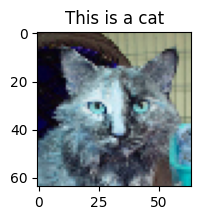

In [36]:
show_images(X_train.T, y_train.T, 2)

In [37]:
def show_image_prediction(X, idx, model) :
  image = X[idx].reshape(1,-1)
  image_class = classes[model.predict(image).item()]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("Test {} : I think this is {}".format(idx, image_class))
  plt.show()

In [38]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV

In [39]:
clf = LogisticRegressionCV()
X_train_lr, y_train_lr = X_train.T, y_train.T.ravel()

In [40]:
clf.fit(X_train_lr, y_train_lr)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

LogisticRegressionCV()

In [41]:
print("Model accuracy : {:.2f}%".format(clf.score(X_train_lr, y_train_lr))*100)

Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accu

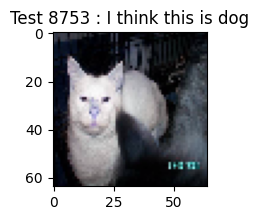

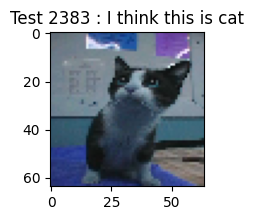

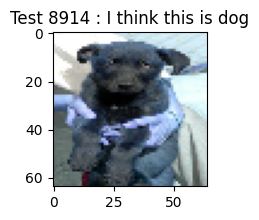

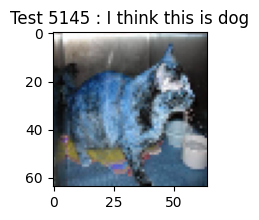

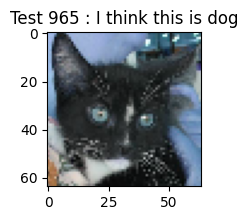

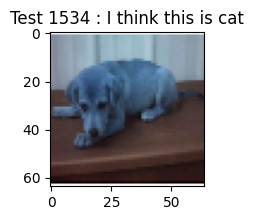

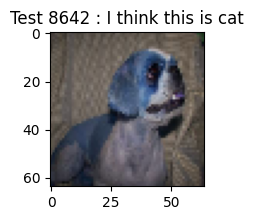

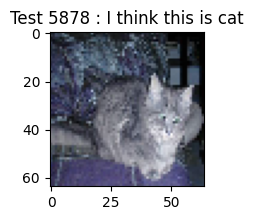

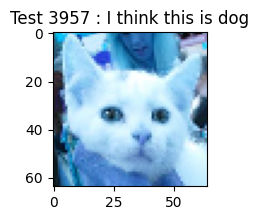

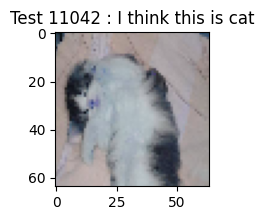

In [42]:
X_test_lr, test_idx = X_test.T, test_idx.T

for i in np.random.randint(0, len(X_test_lr), 10) :
  show_image_prediction(X_test_lr, i, clf)

In [43]:
submission = pd.DataFrame(np.hstack([test_idx, clf.predict_proba(X_test_lr)]), columns=['id', 'cat', 'dog'])

In [44]:
submission = submission.drop(['cat'], axis=1)
submission = submission.rename(index=str, columns={"dog": "label"})
submission['id'] = submission['id'].astype(int)
submission.sort_values('id', inplace=True)

In [45]:
submission.head()

,id,label
0,0,0.259901
8328,0,0.380650
8329,0,0.258296
8330,0,0.684908
8331,0,0.522250


In [46]:
submission.to_csv('Dog_vs_Cat_Submission.csv', index=False)